In [1]:
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px
from dotenv import load_dotenv
import os


In [2]:
os.listdir()

['.env', '.ipynb_checkpoints', 'Netflix.ipynb']

In [3]:

# Charger les variables depuis le fichier .env
load_dotenv()

# Récupération des variables
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
dbname = os.getenv("DB_NAME")

# Connexion à PostgreSQL
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{dbname}")


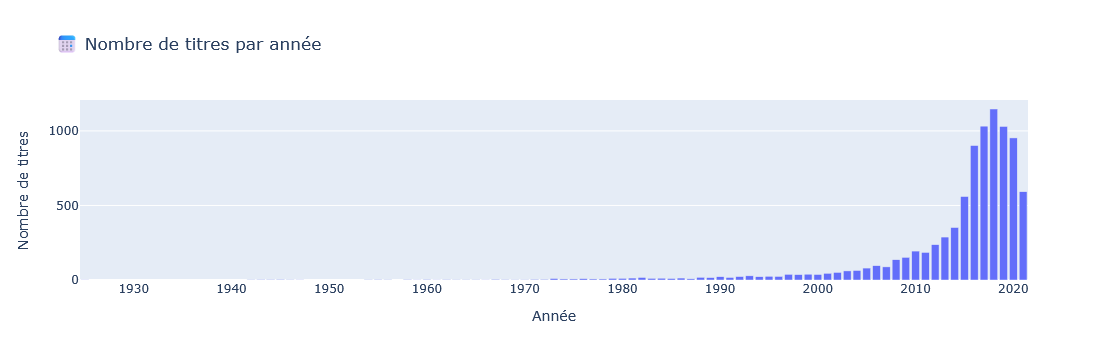

In [4]:
query_year = """
SELECT release_year, COUNT(*) AS nb_titles
FROM netflix_titles
GROUP BY release_year
ORDER BY release_year;
"""
df_year = pd.read_sql(query_year, engine)

fig1 = px.bar(df_year, x='release_year', y='nb_titles',
              title='📅 Nombre de titres par année',
              labels={'release_year': 'Année', 'nb_titles': 'Nombre de titres'})
fig1.show()


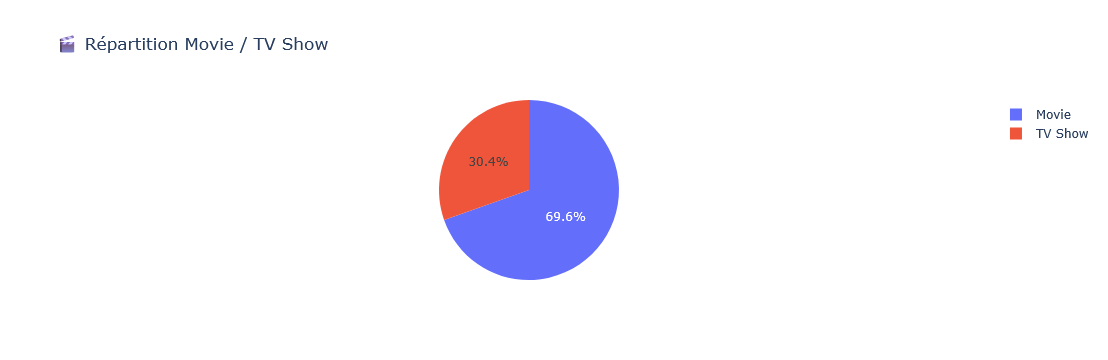

In [6]:
query_type = """
SELECT content_type, COUNT(*) AS total
FROM netflix_titles
GROUP BY content_type;
"""
df_type = pd.read_sql(query_type, engine)

fig2 = px.pie(df_type, names='content_type', values='total',
              title='🎬 Répartition Movie / TV Show')
fig2.show()


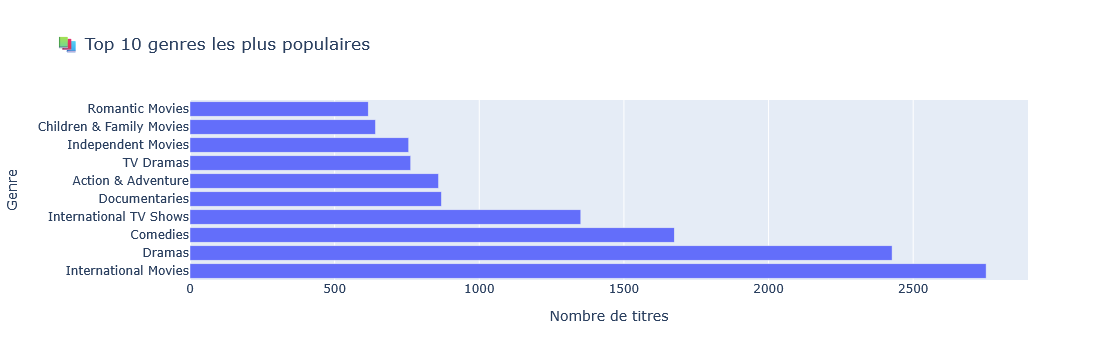

In [7]:
query_genre = """
SELECT genre, COUNT(*) AS nb
FROM (
    SELECT UNNEST(string_to_array(listed_in, ', ')) AS genre
    FROM netflix_titles
) AS sub
GROUP BY genre
ORDER BY nb DESC
LIMIT 10;
"""
df_genre = pd.read_sql(query_genre, engine)

fig3 = px.bar(df_genre, x='nb', y='genre', orientation='h',
              title='📚 Top 10 genres les plus populaires',
              labels={'genre': 'Genre', 'nb': 'Nombre de titres'})
fig3.show()


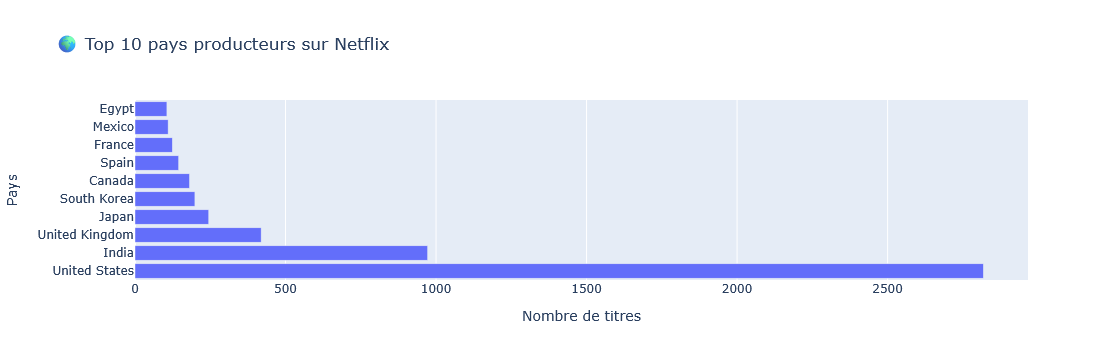

In [8]:
query_countries = """
SELECT country, COUNT(*) AS nb_titles
FROM netflix_titles
WHERE country IS NOT NULL
GROUP BY country
ORDER BY nb_titles DESC
LIMIT 10;
"""
df_countries = pd.read_sql(query_countries, engine)

fig = px.bar(df_countries, x='nb_titles', y='country', orientation='h',
             title='🌍 Top 10 pays producteurs sur Netflix',
             labels={'country': 'Pays', 'nb_titles': 'Nombre de titres'})
fig.show()


In [9]:
query_duration = """
SELECT AVG(CAST(REPLACE(duration, ' min', '') AS INT)) AS avg_duration
FROM netflix_titles
WHERE content_type = 'Movie'
  AND duration IS NOT NULL
  AND duration ~ '^[0-9]+ min$'
"""
df_duration = pd.read_sql(query_duration, engine)
df_duration



,avg_duration
0,99.577187


In [10]:
query_longest = """
SELECT title, duration
FROM netflix_titles
WHERE content_type = 'Movie'
  AND duration IS NOT NULL
  AND duration ~ '^[0-9]+ min$'
ORDER BY CAST(REPLACE(duration, ' min', '') AS INT) DESC
LIMIT 10;
"""

df_longest = pd.read_sql(query_longest, engine)
df_longest


,title,duration
0,Black Mirror: Bandersnatch,312 min
1,Headspace: Unwind Your Mind,273 min
2,The School of Mischief,253 min
3,No Longer kids,237 min
4,Lock Your Girls In,233 min
5,Raya and Sakina,230 min
6,Once Upon a Time in America,229 min
7,Sangam,228 min
8,Lagaan,224 min
9,Jodhaa Akbar,214 min


In [11]:
query_longest = """
SELECT title, duration
FROM netflix_titles
WHERE content_type = 'Movie'
  AND duration IS NOT NULL
  AND duration ~ '^[0-9]+ min$'
ORDER BY CAST(REPLACE(duration, ' min', '') AS INT) DESC
LIMIT 10;
"""

df_longest = pd.read_sql(query_longest, engine)
df_longest


,title,duration
0,Black Mirror: Bandersnatch,312 min
1,Headspace: Unwind Your Mind,273 min
2,The School of Mischief,253 min
3,No Longer kids,237 min
4,Lock Your Girls In,233 min
5,Raya and Sakina,230 min
6,Once Upon a Time in America,229 min
7,Sangam,228 min
8,Lagaan,224 min
9,Jodhaa Akbar,214 min


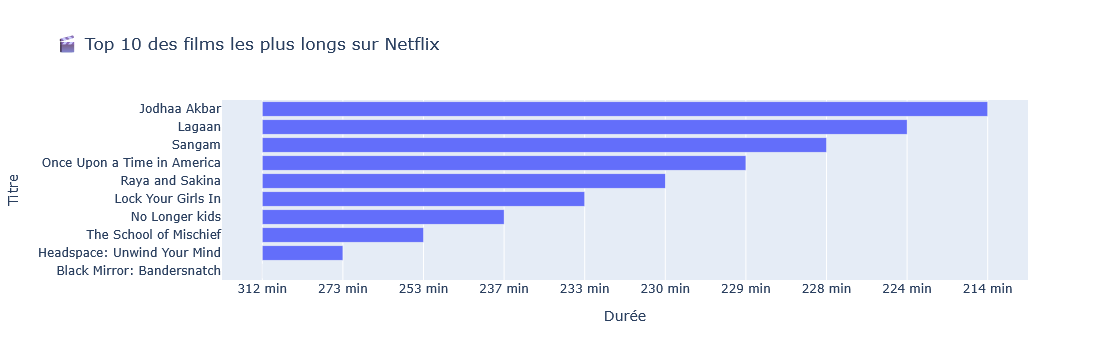

In [12]:
fig = px.bar(df_longest,
             x='duration',
             y='title',
             orientation='h',
             title='🎬 Top 10 des films les plus longs sur Netflix',
             labels={'duration': 'Durée', 'title': 'Titre'})

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()
